#Oriserve- Intern Data Scientist Assignment

# Subtheme Sentiment Analysis Task

#Task:

 The task is to develop an approach that given a sample will identify the subthemes along with
 their respective sentiments.


#Approach:
We develop a rule-based approach combined with natural language processing (NLP) techniques to identify subtheme sentiments in customer reviews. Each review is tokenized and analyzed for key aspects (subthemes) and their associated sentiments using TextBlob. Sentiments are classified as positive, negative, or neutral based on polarity scores. The subthemes are identified by matching predefined keywords with review segments.

#Problem to be solved:
Given a dataset containing some text related to a movie, the problem is to predict the sentiment behind the statement in the form of 0 and 1 label (0 for negative and 1 for positive)

Let's first begin with importing all the necessary libraries.Quickly go through the purpose of the libraries.

Pandas- for storing and analysing the data.

CountVectorizer-to get the frequency of words.

re-for locating and matching patterns in text.

PorterStemmer-for stemming words.

nltk-for accessing other packages like PorterStemmer and stopwords.

stopwords-for removal os stopwords.

WordCloud-for generating word cloud showing words according to their frequency in the text.

matplotlib-for plotting some necessary graphs.

TfidVectorizer-to generate word vectors based on the document weightage.

In [1]:
#importing pandas library
import pandas as pd
#import count vectorizer function from sklearn
import re
#importing re library
import re
#Importing stemmer function from NLTK library
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#Importing NLTK library and stopwords.
from nltk.corpus import stopwords
#Importing Word cloud
from wordcloud import WordCloud, STOPWORDS
#Importing matplotlib library to plot pie chart.
import matplotlib.pyplot as plt
#importing tfiVectorizer from sklearn for feature extraction.
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


After importing all the libraries, let's download the stopwords from nltk and load the english language stopwords in a variable using the words method from the stopwords class.

In [2]:
#downloading stopwords from nltk
#loading englsih stopwords in the 'stop' variable
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In the next cell,

porter(any name can be chosen) object of the PorterStemmer class is created as object is an instance of the class that can implement all the methods and functionalities of the class.
count(any name can be chosen) object of the CountVectorizer class is created as object is an instance of the class that can implement all the methods and functionalities of the class

In [3]:
#creating objects of PorterStemmer and CountVectorizer class
from sklearn.feature_extraction.text import CountVectorizer
# creating object of the PorterStemmer class
porter = PorterStemmer()

# creating object of the CountVectorizer class
count = CountVectorizer()

The code uses TextBlob for sentiment analysis to classify each review's sentiment as positive, negative, or neutral, aiding in identifying subtheme sentiments within customer reviews.

In [13]:
from textblob import TextBlob

Next, we load the data into the 'data' variable using the 'read_csv' method from pandas. Don't forget to download the trainig data and upload it into the project location before implementing the project. Also we print the first five rows of the dataset using the 'head' method.

In [47]:
data=pd.read_csv("/content/Evaluation-dataset.csv")

In [48]:
data.head()

,Customer_Review,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,Review10,Review11,Review12,Review13,Review14
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here fill the column where the "NaN" values are there with "0".

In [49]:
for col in data.columns[1:]:
    if pd.isna(data[col]).sum() > 0:
        data[col].fillna(0, inplace=True)

In [50]:
data.head()

,Customer_Review,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,Review10,Review11,Review12,Review13,Review14
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,0,0,0,0,0,0,0,0,0,0,0,0
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,0,0,0,0,0,0,0,0,0,0,0,0
2,Very easy to use and good value for money.,value for money positive,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Really easy and convenient to arrange,ease of booking positive,0,0,0,0,0,0,0,0,0,0,0,0,0
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,0,0,0,0,0,0,0,0,0,0,0


Here, copy the first column of the data underneath the customer review perfectly to determine whether it's positive or negative using TextBlob sentiment analysis.

In [57]:
data2=data[["Customer_Review"]].copy()

In [58]:
data2.head()

,Customer_Review
0,Tires where delivered to the garage of my choi...
1,"Easy Tyre Selection Process, Competitive Prici..."
2,Very easy to use and good value for money.
3,Really easy and convenient to arrange
4,It was so easy to select tyre sizes and arrang...


In [59]:
# Function to tokenize and analyze sentiment
def sentiment_to_index(review):
    if pd.isna(review):
        return 0
    blob = TextBlob(review)
    return 1 if blob.sentiment.polarity > 0 else -1

In [61]:
data2["sentiment"] = data2["Customer_Review"].apply(sentiment_to_index)

In [62]:
data2.head()

,Customer_Review,sentiment
0,Tires where delivered to the garage of my choi...,1
1,"Easy Tyre Selection Process, Competitive Prici...",1
2,Very easy to use and good value for money.,1
3,Really easy and convenient to arrange,1
4,It was so easy to select tyre sizes and arrang...,1


In [63]:
data2["sentiment"].value_counts()

sentiment
 1    9048
-1    1084
Name: count, dtype: int64

In [64]:
data2.shape

(10132, 2)

In the next part, we segregate the data based on the positive and negative labels. Text with positive label is stored in 'pos' variable and text with negative label is stored in 'neg' variable.

In [66]:


# Calculate the percentage of positive and negative reviews in each row
data['positive_percentage'] = (data2["sentiment"] == 1).sum(axis=0) / len(data2["sentiment"]) * 100
data['negative_percentage'] = (data2["sentiment"] == -1).sum(axis=0) / len(data2["sentiment"]) * 100

In [68]:
data['positive_percentage'].mean()

89.30122384524277

In [69]:
data['negative_percentage'].mean()

10.698776154757208

Now we plot a pie chart of the positive and negative data to understand the ratio of the data. Matplotlib library is used to plot the pie chart using various parameters.

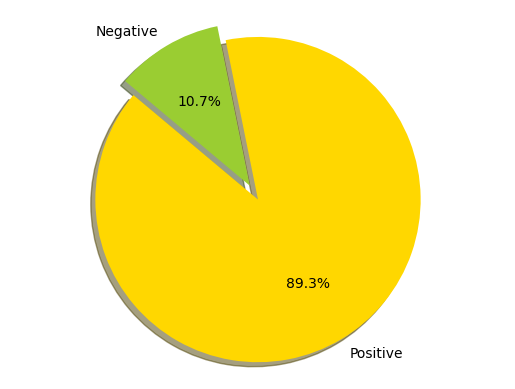

In [73]:

# Data to plot
labels = 'Positive', 'Negative'
sizes = [data['positive_percentage'].mean(), data['negative_percentage'].mean()]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

We can see that the percentage of positive and negative data is equal i.e. 50% each. Which means that there is enough training data of both the classes.

Next, we define a preprocessing function using regular expressions to clean the data and remove unnecessary things in the text.
Any of the html tags are represented by '<[^>]*>' and replaced with a whitespace. Non word characters are replaced with a whitespace and the text is converted into lowercase. Emoji symbols in the text are joined at the end of the text by replacing the '-' in the emoji with a whitespace.

In [74]:
# Custom preprocessing function
def preprocess(text):
    text = re.sub(r'<[^>]*>', '', text)  # Remove HTML tags
    emoji = re.findall(r'(:\)|:D|:\(|;\)|:\||\(D|P)', text)  # Extract emojis
    text = re.sub(r'\W+', ' ', text.lower()) + ' '.join(emoji).replace('-', ' ')
    return text#Defining preprocessing function to process the data

In [75]:
data2["Customer_Review"].apply(preprocess)

0        tires where delivered to the garage of my choi...
1        easy tyre selection process competitive pricin...
2               very easy to use and good value for money 
3                    really easy and convenient to arrange
4        it was so easy to select tyre sizes and arrang...
                               ...                        
10127    i ordered the wrong tyres however redacted arr...
10128    good experience first time i have used redacte...
10129    i ordered the tyre i needed on line booked a s...
10130    excellent service from point of order to fitti...
10131    seamless well managed at both ends i would rec...
Name: Customer_Review, Length: 10132, dtype: object

In [76]:
data2.head()

,Customer_Review,sentiment
0,Tires where delivered to the garage of my choi...,1
1,"Easy Tyre Selection Process, Competitive Prici...",1
2,Very easy to use and good value for money.,1
3,Really easy and convenient to arrange,1
4,It was so easy to select tyre sizes and arrang...,1


Here, a function tokenizer_porter is defined that stems the splitted words using the stem function from PorterStemmer class.

In [77]:
#Defining function for Tokenizer porter
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

Ahead we segregate the processed data into positive and negative data based on the labels.

In [79]:
#getting positive
positive_data = data2[ data2["sentiment"] == 1]
positive_data = positive_data["Customer_Review"]
#try to get negative data

In [80]:
negitive_data = data2[ data2['sentiment'] == 1]
negitive_data = negitive_data["Customer_Review"]

Now we define a function that will plot the word cloud for our data. The words 'movie' and 'film' are ignored for cleaning the words. Next the wordcloud is formed by giving various parameters like stopwords, background colour, etc

In [83]:
#Defining the function to plot the data in wordcloud
def plot_wordcloud(data, color = 'white'):
    words=" ".join(data)
    clean_word=" ".join([word for word in words.split() if(word!="movie" and word!="film")])
    wordcloud=WordCloud(stopwords=STOPWORDS,background_color=color,width=2500,height=200).generate(clean_word)
    plt.figure(1,figsize=(10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
  #your code for plotiing in wordcloud

Now that we have the word cloud plotting function, we will plot the word cloud for the positive data using white background colour.

Positive words


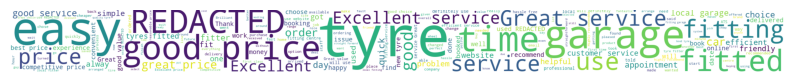

In [84]:
#Printing the positive data in wordcloud
print("Positive words")
plot_wordcloud(positive_data,'white')

The word cloud is plotted and we see that the most occuring words are one, like, character. Other words can also be seen with different frequencies.

Next, we will plot the word cloud for the negative data using black background colour.

Negitive words


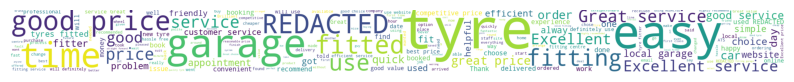

In [85]:
#Printing the negative data in wordcloud
# try for negative words
print("Negitive words")
plot_wordcloud(negitive_data,'white')

After plotting we see that words like even,one,like,character,get,scene,etc have higher frequencies of appearing in the text.

Next, tfid object of the TfidVectorizer class is created by giving various parameters. The tokenizer_porter function that we defined earlier has been passed as the tokenizer in this vectorizer

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(lowercase=True,tokenizer=tokenizer_porter)
#assigning values in y i.e label.values
y=data2.sentiment.values

In [89]:
y

array([1, 1, 1, ..., 1, 1, 1])

Next, the data is scaled using fit_transform function into the x variable which means that vectorization has been applied to the data and stored into the x variable which will be further used for training.

In [92]:

x=tfid.fit_transform(data2.Customer_Review)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


It is time to split our data as it is now ready for further processing. train_test_split from sklearn helps us to do that. It will split the data into training and testing data so that we can check the model accuracy easily by referring or comparing with the original values in tha dataset. test size is taken as 0.5 which means that 50% of the data is for training and remaining 50% for testing. The splitted data is stored in four different variables.

X_train: independent training data

X_test: independent testing data

y_train: prediction of the training data (labels in this case)

y_test: prediction of the testing data(labels in this case)

In [93]:
 #splitting the train and test split using train_test_split function of sklearn
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

A model is created by passing various parameters. Number of folds in cross validation is given as 6, scoring is estimated based on accuracy and maximum iterations are set to 500 (you may try out with some other values). The model is then fitted on the training data and further predicted on the test data(X_train) to get y_pred which is the predicted labels.

In [94]:
#making predication using predict
from sklearn.linear_model import LogisticRegressionCV

# Create a model
model = LogisticRegressionCV(cv=6, scoring='accuracy', max_iter=500)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Wohoo!! our model is trained. Its time to check how well it has learnt everything. For that we use accuracy_score from metrics package of the sklearn library. The predicted labels and actual test labels are passed as parameters to get the accuracy score.

In [95]:
from sklearn import metrics

# Calculate the accuracy of our model
accuracy = metrics.accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)
# Accuracy of our built model

Accuracy: 0.9320963284642716


That's cool, 93% is the accuracy of our model . We got on Subtheme Sentiment Analysis Task.